# Load and Save File

In [1]:
import mdapy as mp
import numpy as np
from time import time
mp.__version__

'1.0.0a1'

In [2]:
import ovito
ovito.version

(3, 13, 1)

In [3]:
system = mp.build_crystal('Cu', 'FCC', 3.615, nx=100, ny=100, nz=100)
N = system.N
print(f'Atom number is {N}.')
print('Saving to test.data.')
system.write_data('test.data', element_list=['Cu'])
print('Saving to test.dump')
system.write_dump('test.dump')
print('Saving to test.xyz')
system.write_xyz('test.xyz')
print('Saving to test.xyz.gz')
system.write_xyz('test.xyz', compress=True)
print('Saving to test.mp')
system.write_mp('test.mp')

Atom number is 4000000.
Saving to test.data.
Saving to test.dump
Saving to test.xyz
Saving to test.xyz.gz
Saving to test.mp


In [4]:
def get_load_time(fmt:str):
    start = time()
    for _ in range(3):
        _ = mp.System(f'test.{fmt}')
    end = time()
    mdapy_time = (end - start)/3
    if fmt == 'mp':
        ovito_time = -1
    else:
        start = time()
        for _ in range(3):
            _ = ovito.io.import_file(f'test.{fmt}')
        end = time()
        ovito_time = (end - start)/3
    return mdapy_time, ovito_time

In [5]:
def get_save_time(fmt:str):
    system = mp.System(f'test.{fmt}')
    start = time()
    for _ in range(1):
        if fmt == 'dump':
            system.write_dump(f'mdapy.{fmt}')
        elif fmt == 'data':
            system.write_data(f'mdapy.{fmt}')
        elif fmt == 'xyz':
            system.write_xyz(f'mdapy.{fmt}')
        elif fmt == 'xyz.gz':
            system.write_dump(f'mdapy.xyz', compress=True)
        elif fmt == 'mp':
            system.write_mp(f'mdapy.{fmt}')
    end = time()
    mdapy_time = (end - start)/3
    if fmt == 'mp':
        ovito_time = -1
    else:
        pipeline = ovito.io.import_file(f'test.{fmt}')
        start = time()
        for _ in range(1):
            if fmt == 'dump':
                ovito.io.export_file(pipeline, f'ovito.{fmt}', format='lammps/dump', columns=["Particle Identifier", "Particle Type", "Position.X", "Position.Y", "Position.Z"])
            elif fmt == 'data':
                ovito.io.export_file(pipeline, f'ovito.{fmt}', format='lammps/data', atom_style='atomic')
            elif fmt == 'xyz':
                ovito.io.export_file(pipeline, f'ovito.{fmt}', format='xyz', columns=["Particle Identifier", "Particle Type", "Position.X", "Position.Y", "Position.Z"])
            elif fmt == 'xyz.gz':
                ovito.io.export_file(pipeline, f'ovito.{fmt}', format='xyz', columns=["Particle Identifier", "Particle Type", "Position.X", "Position.Y", "Position.Z"])
        end = time()
        ovito_time = (end - start)/3
    return mdapy_time, ovito_time

In [6]:
load_time = []
for fmt in ['dump', 'data', 'xyz', 'xyz.gz', 'mp']:
    load_time.append([*get_load_time(fmt)])
load_time = np.array(load_time)

In [7]:
save_time = []
for fmt in ['dump', 'data', 'xyz', 'xyz.gz', 'mp']:
    save_time.append([*get_save_time(fmt)])
save_time = np.array(save_time)

Text(0.5, 1.0, 'Load data')

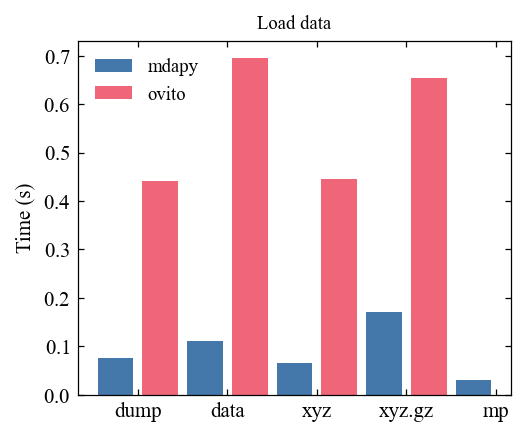

In [8]:
fig, ax = mp.set_figure(figdpi=150)
x = np.arange(5)*2
ax.bar(x, load_time[:, 0], label = 'mdapy')
ax.bar(x[:-1]+1, load_time[:-1, 1], label='ovito')

ax.legend()
ax.set_xticks(x+0.5)
ax.set_xticklabels(['dump', 'data', 'xyz', 'xyz.gz', 'mp'])
ax.set_ylabel('Time (s)')
ax.set_title('Load data')

Text(0.5, 1.0, 'Save data')

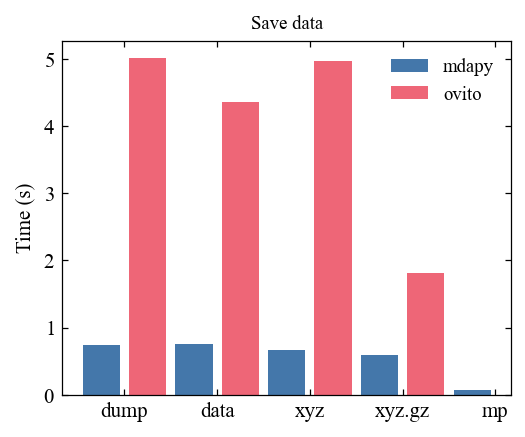

In [9]:
fig, ax = mp.set_figure(figdpi=150)
x = np.arange(5)*2
ax.bar(x, save_time[:, 0], label = 'mdapy')
ax.bar(x[:-1]+1, save_time[:-1, 1], label='ovito')

ax.legend()
ax.set_xticks(x+0.5)
ax.set_xticklabels(['dump', 'data', 'xyz', 'xyz.gz', 'mp'])
ax.set_ylabel('Time (s)')
ax.set_title('Save data')

In [10]:
!rm test* mdapy* ovito*